# learning objectives [2025-03-04]
- Deep Learning with PyTorch: A 60 Minute Blitz
- Learning duration: 60 mins

## intuitive understanding

深度学习里为什么要求导
- 我可以构建任何一个函数F，这个F可以是任何结构，包含了变量和参数
- 我有可训练的数据，也有label，就可以“训练”来更新参数
- 所以，我必须构建Loss Function，来计算偏差，最终我的目的变成了数学上的求Loss Function的最小值
- 一个参数的情况下，Loss Function就是这个参数的函数
- 梯度下降是找最小值的经典算法，随机给一个点，我可以求得这个点的导数，称为梯度，然后设置一个步长，我就可以向下走一步，一直迭代下去，我就可以找到最小值
- 所以，求导的目的就是，随时求得这个参数点下的当前梯度，从而进行跟新

核心概念：
1. 函数，变量，参数
2. 损失函数
3. 最小化损失函数，梯度下降算法
4. 求导

两个概念：
1. 前向传播（Forward Pass），用于计算预测值
2. 反向传播（Backward Pass），用于计算损失函数的参数的导数

loss.backward() 的作用

计算梯度
- loss.backward() 触发 反向传播，即从损失函数 loss 开始，自动计算所有 需要梯度的张量 的梯度。
- 它通过 链式法则（Chain Rule）逐层计算每个参数的梯度，反向传播到模型的每一层（从输出层到输入层）。

# Tensors

In [12]:
import torch
import numpy as np

In [14]:
# create from normal data
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [15]:
data = [[[1,2], [3,4]],[[1,2], [3,4]]]
x_data = torch.tensor(data)
x_data

tensor([[[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]]])

In [16]:
data = [[[[1,2], [3,4]],[[1,2], [3,4]]],[[[1,2], [3,4]],[[1,2], [3,4]]]]
x_data = torch.tensor(data)
x_data

tensor([[[[1, 2],
          [3, 4]],

         [[1, 2],
          [3, 4]]],


        [[[1, 2],
          [3, 4]],

         [[1, 2],
          [3, 4]]]])

In [17]:
# from numpy data
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[[[1, 2],
          [3, 4]],

         [[1, 2],
          [3, 4]]],


        [[[1, 2],
          [3, 4]],

         [[1, 2],
          [3, 4]]]])

In [18]:
# torch.ones_like 是 PyTorch 中的一个函数，它用于创建一个 形状和数据类型（dtype） 与给定张量相同，但所有元素都为 1 的新张量。
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[[[1, 1],
          [1, 1]],

         [[1, 1],
          [1, 1]]],


        [[[1, 1],
          [1, 1]],

         [[1, 1],
          [1, 1]]]]) 



In [22]:
x_rand = torch.rand_like(x_data, dtype=torch.float16) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[[[0.9385, 0.3447],
          [0.1611, 0.0947]],

         [[0.7944, 0.0752],
          [0.2817, 0.1660]]],


        [[[0.3384, 0.7241],
          [0.8970, 0.2798]],

         [[0.0273, 0.4692],
          [0.6152, 0.3267]]]], dtype=torch.float16) 



In [25]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5998, 0.6597, 0.5725],
        [0.7333, 0.7309, 0.1198]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [26]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 0D-4D Tensor
- N-dimensional array

In [27]:
# 0D Tensor (标量)
scalar = torch.tensor(np.array(5))

# 1D Tensor (向量)
vector = torch.tensor(np.array([1, 2, 3]))

# 2D Tensor (矩阵)
matrix = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

# 3D Tensor (立方体)
tensor_3d = torch.tensor(np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]]))

# 打印形状
print(scalar.shape)     # 输出：()
print(vector.shape)     # 输出：(3,)
print(matrix.shape)     # 输出：(2, 3)
print(tensor_3d.shape)  # 输出：(2, 2, 2)

torch.Size([])
torch.Size([3])
torch.Size([2, 3])
torch.Size([2, 2, 2])


## Tensor Operations
- Over 100 tensor operations

In [28]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [30]:
# Standard numpy-like indexing and slicing:
tensor = torch.ones(2,3,4)
tensor[:,1] = 0
print(tensor)

tensor([[[1., 1., 1., 1.],
         [0., 0., 0., 0.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [0., 0., 0., 0.],
         [1., 1., 1., 1.]]])


Indexing a 4D tensor in PyTorch follows the same principles as indexing lower-dimensional tensors but with an extra level of depth. A 4D tensor is usually shaped as (N, C, H, W) in deep learning, representing:
- 	•	N: Batch size
- 	•	C: Number of channels
- 	•	H: Height
- 	•	W: Width

In [35]:
# Standard numpy-like indexing and slicing:
tensor = torch.ones(2,3,4)
tensor[0:2,1,1] = 0
print(tensor)

tensor([[[1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.]]])


In [36]:
# Joining tensors You can use torch.cat to concatenate

In [37]:
t1 = torch.cat([tensor,tensor,tensor], dim = 1)
print(t1)

tensor([[[1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 1., 1.]]])


In [38]:
# Multiplying tensors

In [46]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [40]:
# computes the matrix multiplication between two tensors

In [42]:
tensor = torch.ones(4,4)

In [44]:
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [43]:
tensor.matmul(tensor.T)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [45]:
tensor @ tensor.T

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])

In [47]:
# In-place operations Operations

In [48]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


## Tensors NumPy share

In [49]:
# Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [50]:
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [51]:
t.add_(2)
print(t)
print(n)

tensor([3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3.]


In [52]:
# NumPy array to Tensor

In [53]:
n = np.ones(5)
t = torch.from_numpy(n)

In [54]:
np.add(n, 1, out = n)
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# A Gentle Introduction to torch.autograd

In [55]:
import torch

In [56]:
from torchvision.models import resnet18, ResNet18_Weights

In [58]:
ResNet18_Weights.DEFAULT

ResNet18_Weights.IMAGENET1K_V1

In [57]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)

In [68]:
# model

In [60]:
data = torch.rand(1,3,64,64)

In [61]:
labels = torch.rand(1,1000)

In [62]:
prediction = model(data)

In [63]:
loss = (prediction - labels).sum()

In [66]:
loss

tensor(-508.7655, grad_fn=<SumBackward0>)

In [64]:
loss.backward()

### QA：GPT：loss只是一个tensor数值，为什么可以执行一个函数操作backward？
- 在 PyTorch 中，loss 虽然是一个标量张量（tensor），但它记录了整个计算图（computational graph），所以可以调用 backward() 来执行反向传播。
- loss 不是普通的数值，而是计算图的终端节点。在 PyTorch 中，所有涉及可训练参数（requires_grad=True）的计算都会自动构建计算图（computational graph），而 loss 是这个计算图的最终结果。
- loss 记录了计算过程。当你执行 前向传播（forward pass） 时，PyTorch 通过**动态计算图（Dynamic Computation Graph）**记录所有操作

当你调用 loss.backward()，PyTorch 会：
1. 从 loss 反向遍历计算图，计算每个张量的梯度（链式法则）。
2. 将梯度存储到 tensor.grad 里，用于优化器更新参数。

In [72]:
# 这个与loss function的定义可以分开，这就是个优化器初始化语句
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [73]:
# momentum 参数用于 加速梯度下降，减少震荡，并提高收敛速度。它引入了一个**惯性（Momentum）**机制，使优化器在更新参数时考虑之前梯度的方向，而不是仅仅依赖当前梯度。

In [74]:
optim.step()

## Autograd

In [109]:
a = torch.tensor([2.,3.], requires_grad=True)
b = torch.tensor([6.,4.], requires_grad=True)

In [110]:
Q = 3*a**3 - b**2

In [95]:
external_grad = torch.tensor([1.,1.])

In [111]:
# external_grad = torch.tensor([0.,1.]) # don't change it

In [112]:
Q.backward(gradient=external_grad)

In [98]:
# 只有标量（scalar）输出才能自动计算梯度。
Q.sum().backward()

### QA: backward函数里的gradient参数有什么用
- gradient 参数：当你想手动指定梯度时使用，比如在多输出的情况下，或者需要特殊的自定义梯度计算时。
- 只有标量（scalar）输出才能自动计算梯度。backward不能对数组进行操作！

In [113]:
9*a**2

tensor([36., 81.], grad_fn=<MulBackward0>)

In [114]:
a.grad

tensor([ 0., 81.])

In [101]:
9*a**2 == a.grad

tensor([True, True])

In [102]:
-2*b == b.grad

tensor([True, True])

## DAG

In [83]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand(5,5, requires_grad=True)

In [84]:
a = x + y

In [86]:
a.requires_grad

False

In [87]:
b = y + z

In [88]:
b.requires_grad

True

## freeze parameters

In [89]:
for param in model.parameters():
        param.requires_grad = False

In [90]:
model.fc = nn.Linear(512, 10)

In [92]:
# Optimize only the classifier
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

## one complete example

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的模型
model = nn.Linear(2, 1)

# 选择优化器（这里使用SGD）
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 设定学习率为0.01

# 定义损失函数
loss_fn = nn.MSELoss()

# 模拟输入和标签
x = torch.randn(10, 2)
y = torch.randn(10, 1)

# 前向传播
output = model(x)

# 计算损失
loss = loss_fn(output, y)

# 反向传播计算梯度
loss.backward()

# 更新参数
optimizer.step()  # 关键步骤：优化器根据梯度调整参数

# 清空梯度，避免下一次计算时梯度累积
optimizer.zero_grad()

# Neural Networks

## 概念QA
- GPT: 通俗解释CNN模型，以及各个layer的作用
- 仔细说明Convolutional Layer做了哪些操作？
- 仔细说明Pooling Layer做了哪些操作？
- 为什么Pooling Layer也叫Subsampling layer？
- 为什么卷积和池化要做多次？
- torch.flatten这个函数有什么作用？flatten会不会丢失空间位置信息？
- 为什么CNN最后要加入多个全连接层？

## 细节QA
- Conv2d和Linear的参数细节
- 解释一下nn.Conv2d函数的参数
- 在nn.Conv2d里，为什么channel数发生了变化？
- 解释一下nn.Linear函数的参数
- 解释一下max_pool2d函数的参数
- CNN里怎么计算每个层的dimension？【卷积层的输出维度计算，池化层的输出维度计算】
- 为什么可以backprops with random gradients
- pytorch里view函数的作用，及其参数的含义？

## Define the network

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5) # in_channels, out_channels, kernel_size
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120) # in_features, out_features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, input):
        c1 = F.relu(self.conv1(input))
        s2 = F.max_pool2d(c1,(2,2)) # input, kernel_size
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3,2)
        s4 = torch.flatten(s4,1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6)
        return output

In [3]:
net = Net()

In [4]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
import numpy as np

In [5]:
params = list(net.parameters())

In [15]:
net.parameters()

<generator object Module.parameters at 0x7f36c3b47150>

In [17]:
# params

In [19]:
print(len(params))

10


In [20]:
print(params[0].size())

torch.Size([6, 1, 5, 5])


In [21]:
input = torch.randn(1,1,32,32)

In [22]:
out = net(input)
print(out)

tensor([[-0.0769, -0.0438, -0.0793, -0.1197, -0.0217, -0.0171,  0.0178, -0.0572,
          0.1261, -0.0500]], grad_fn=<AddmmBackward0>)


In [23]:
net.zero_grad()

In [24]:
out.backward(torch.randn(1,10))

## Loss Function

In [25]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

In [26]:
loss = criterion(output, target)

In [27]:
print(loss)

tensor(1.2778, grad_fn=<MseLossBackward0>)


```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> flatten -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```

In [28]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

In [129]:
net.zero_grad()

In [130]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


In [131]:
loss.backward()

In [132]:
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0016,  0.0060, -0.0126,  0.0056,  0.0130,  0.0017])


## Update the weights

In [133]:
import torch.optim as optim

In [134]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [135]:
optimizer.zero_grad()

In [136]:
output = net(input)

In [137]:
loss = criterion(output, target)

In [138]:
loss.backward()

In [140]:
optimizer.step()

In [141]:
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([ 0.0016,  0.0060, -0.0126,  0.0056,  0.0130,  0.0017])


## details

In [18]:
x = torch.arange(12).float()

# 变成 3×4（显式指定）
y1 = x.view(3, 4)
print(y1.shape)  # torch.Size([3, 4])

# 变成 3×4（用 -1 自动推断）
y2 = x.view(3, -1)
print(y2.shape)  # torch.Size([3, 4])

# 变成 2×6（用 -1 自动推断）
y3 = x.view(-1, 6)
print(y3.shape)  # torch.Size([2, 6])

torch.Size([3, 4])
torch.Size([3, 4])
torch.Size([2, 6])


# Training a Classifier

## Load and normalize CIFAR10


In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ]
)

In [31]:
batch_size = 4

In [32]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [33]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

In [34]:
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

Files already downloaded and verified


In [35]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [36]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [39]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

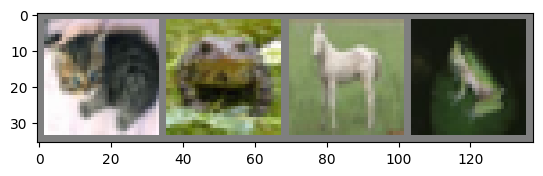

In [40]:
imshow(torchvision.utils.make_grid(images))

In [41]:
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

cat   frog  horse frog 


## Define a Convolutional Neural Network

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [46]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.519
[1,  4000] loss: 1.460
[1,  6000] loss: 1.406
[1,  8000] loss: 1.402
[1, 10000] loss: 1.357
[1, 12000] loss: 1.324
[2,  2000] loss: 1.242
[2,  4000] loss: 1.255
[2,  6000] loss: 1.262
[2,  8000] loss: 1.252
[2, 10000] loss: 1.220
[2, 12000] loss: 1.210
Finished Training


In [48]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Test the network on the test data

In [49]:
dataiter = iter(testloader)
images, labels = next(dataiter)

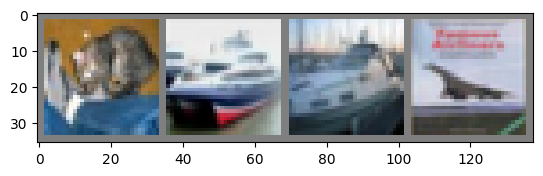

GroundTruth:  cat   ship  ship  plane


In [50]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [51]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [52]:
outputs = net(images)

In [54]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  car   plane


In [57]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 58 %


In [58]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 73.7 %
Accuracy for class: car   is 74.8 %
Accuracy for class: bird  is 48.2 %
Accuracy for class: cat   is 51.7 %
Accuracy for class: deer  is 38.9 %
Accuracy for class: dog   is 41.9 %
Accuracy for class: frog  is 58.0 %
Accuracy for class: horse is 67.0 %
Accuracy for class: ship  is 64.2 %
Accuracy for class: truck is 66.4 %


## Training on GPU

In [59]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [60]:
print(device)

cuda:0


In [61]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [62]:
inputs, labels = data[0].to(device), data[1].to(device)